# 유방암 데이터
- 10, 5, 2차원으로 차원축소
- 원본과 차원축소한 데이터의 분류 정확도 측정
- 2차원으로 축소한 것은 시각화
- 군집화하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

- 10차원으로 축소

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [5]:
# 분류 정확도
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify = cancer.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.9790209790209791

- 5차원으로 축소

In [6]:
pca = PCA(n_components=5)
cancer_pca = pca.fit_transform(cancer_std)
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768])

In [7]:
# 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify = cancer.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.951048951048951

- 2차원으로 축소

In [8]:
pca = PCA(n_components=2)
cancer_pca = pca.fit_transform(cancer_std)

In [9]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [10]:
# 분류 정확도
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca, cancer.target, stratify = cancer.target, random_state=2021
)

dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test,pred)

0.916083916083916

In [11]:
cancer_pca = pca.fit_transform(cancer_std)
cancer_pca_df = pd.DataFrame(cancer_pca, columns=['PC1', 'PC2'])
cancer_pca_df['target'] = cancer.target
cancer_pca_df

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


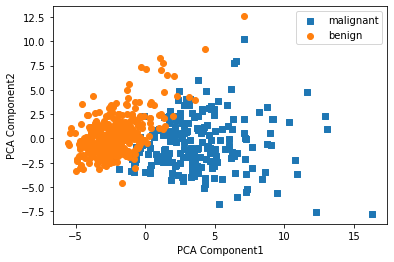

In [12]:
markers = ['s', 'o']

for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df[cancer_pca_df.target == i]['PC1']
    y_axis_data = cancer_pca_df[cancer_pca_df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
                label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA Component1')
plt.ylabel('PCA Component2')
plt.show()

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=2021)
kmeans.fit(cancer_std)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [14]:
cancer_pca_df['target'] = cancer.target
cancer_pca_df['cluster'] = kmeans.labels_
cancer_pca_df.tail()

,PC1,PC2,target,cluster
564,6.439315,-3.576817,0,0
565,3.793382,-3.584048,0,0
566,1.256179,-1.902297,0,0
567,10.374794,1.672010,0,0
568,-5.475243,-0.670637,1,1


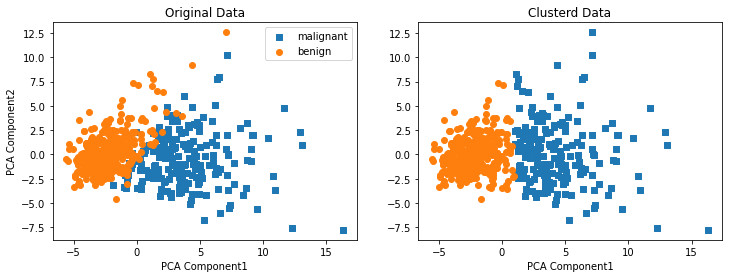

In [15]:
markers = ['s', 'o']

fig, axs = plt.subplots(figsize=(12, 4), ncols=2, nrows=1)
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC1']
        y_axis_data = cancer_pca_df[cancer_pca_df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label=cancer.target_names[i])

    if k == 0:   # target인 경우
        ax.legend()
        ax.set_ylabel('PCA Component2')
        ax.set_title('Original Data')
    else:  # cluster인 경우
        ax.set_title('Clusterd Data')
    ax.set_xlabel('PCA Component1')